
# Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)

from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import sklearn
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Variables Declaration

In [3]:
# references to the past data file
file_path = '/content/drive/My Drive/DatasetTAfix.csv'

# Read and Load Past Data

In [4]:
# read and load past data
data = pd.read_csv(file_path, index_col='Hari_ke')
data.tail()

,Tanggal,Positif,Sembuh,Meninggal,PSBB,Virus Corona
Hari_ke,,,,,,
317,12/1/2021,10047,7068,302,40,79
318,1/13/2021,11278,7657,306,27,78
319,1/14/2021,11557,7741,295,24,63
320,1/15/2021,12818,7491,238,25,80
321,1/16/2021,14224,8662,283,22,80


# Create Training Data, Validating Data and Forecasting Data

In [5]:
# create training data
train_data = data.loc[0:250]
train_data.tail()

,Tanggal,Positif,Sembuh,Meninggal,PSBB,Virus Corona
Hari_ke,,,,,,
246,2/11/2020,2618,3624,101,19,43
247,3/11/2020,2973,3931,102,16,68
248,4/11/2020,3356,3785,113,14,60
249,5/11/2020,4065,3860,89,13,56
250,6/11/2020,3778,3563,94,15,65


In [6]:
# create validating data
valid_data = data.loc[251:len(data)]
valid_data.tail()

,Tanggal,Positif,Sembuh,Meninggal,PSBB,Virus Corona
Hari_ke,,,,,,
317,12/1/2021,10047,7068,302,40,79
318,1/13/2021,11278,7657,306,27,78
319,1/14/2021,11557,7741,295,24,63
320,1/15/2021,12818,7491,238,25,80
321,1/16/2021,14224,8662,283,22,80


# Separate Data to X and Y Variable

In [7]:
x_train = train_data[['Meninggal','Sembuh','Virus Corona','PSBB']]
x_train.tail()

,Meninggal,Sembuh,Virus Corona,PSBB
Hari_ke,,,,
246,101,3624,43,19
247,102,3931,68,16
248,113,3785,60,14
249,89,3860,56,13
250,94,3563,65,15


In [8]:
# separate training data to Y variable
y_train = train_data[['Positif']]
y_train.tail()

,Positif
Hari_ke,
246,2618
247,2973
248,3356
249,4065
250,3778


In [9]:
# separate validating data to X variable
x_valid = valid_data[['Meninggal','Sembuh','Virus Corona','PSBB']]
x_valid.tail()

,Meninggal,Sembuh,Virus Corona,PSBB
Hari_ke,,,,
317,302,7068,79,40
318,306,7657,78,27
319,295,7741,63,24
320,238,7491,80,25
321,283,8662,80,22


In [10]:
# separate validating data to Y variable
y_valid = valid_data[['Positif']]
y_valid.tail()

,Positif
Hari_ke,
317,10047
318,11278
319,11557
320,12818
321,14224


# Pre-Prediction using Linear Regression

In [11]:
# Training Linear Regression model
mlr = LinearRegression()
mlr.fit(x_train, y_train)

# Constructing training data using regression model
y_train_new = mlr.predict(x_train)

df = pd.DataFrame({'Actual' : y_train.values.flatten(),'Predicted' : y_train_new.flatten()}) 
df.sort_index()

,Actual,Predicted
0,2,133.038937
1,0,48.251600
2,0,-36.535737
3,0,-66.026985
4,2,-69.713391
...,...,...
245,2618,3556.873656
246,2973,3861.411370
247,3356,3866.201927
248,4065,3620.104199


HASIL RESIDUAL 1 DARI Y TRAIN

In [12]:
residual_1 = np.array(y_train) - np.array(y_train_new)
residual_1

array([[-1.31038937e+02],
       [-4.82516001e+01],
       [ 3.65357372e+01],
       [ 6.60269850e+01],
       [ 7.17133910e+01],
       [ 8.81454208e+01],
       [ 8.92013594e+01],
       [ 9.00862029e+01],
       [ 8.00990619e+01],
       [ 6.50270384e+01],
       [ 5.86541731e+01],
       [-3.87380190e-01],
       [-7.37042176e+01],
       [-1.45216591e+02],
       [-2.19258305e+02],
       [-1.36239771e+02],
       [-2.79812668e+02],
       [-1.53249771e+02],
       [-1.78262576e+02],
       [-1.31480967e+02],
       [-2.58111078e+02],
       [-1.35671747e+02],
       [-1.52453142e+02],
       [-1.00612422e+02],
       [-2.88485895e+02],
       [-1.03429371e+02],
       [-1.78297756e+02],
       [-9.12309164e+01],
       [-9.01966523e+01],
       [-1.28348531e+02],
       [-2.68194097e+02],
       [-1.73100044e+02],
       [-6.41228984e+01],
       [-2.55813746e+02],
       [-1.34681589e+02],
       [-9.41951921e+00],
       [ 3.19218920e+01],
       [-6.03235524e+01],
       [-2.1

In [13]:
# Constructing validating data using regression model
y_valid_new = mlr.predict(x_valid)

df = pd.DataFrame({'Actual' : y_valid.values.flatten(),'Predicted' : y_valid_new.flatten()}) 
df.sort_index()

,Actual,Predicted
0,4262,3587.706608
1,3880,3451.442132
2,2853,3520.221889
3,3779,3165.385858
4,3770,3087.095412
...,...,...
66,10047,8271.208278
67,11278,8701.790071
68,11557,8573.603355
69,12818,7807.215482


Hasil residual 2 y valid

In [14]:
residual_2 = np.array(y_valid) - np.array(y_valid_new)
residual_2

array([[ 674.29339224],
       [ 428.55786798],
       [-667.22188889],
       [ 613.61414222],
       [ 682.90458754],
       [ 888.00070517],
       [2208.7857292 ],
       [1884.75599728],
       [ 781.06803415],
       [ 168.73480068],
       [ 513.82567467],
       [ 494.75751167],
       [1358.18775746],
       [1150.25448712],
       [1593.99488247],
       [ 296.46392657],
       [ 271.82149325],
       [ 908.78318628],
       [1158.13707789],
       [ 798.50850381],
       [1197.20768763],
       [ 890.06831242],
       [1758.90880187],
       [-153.17935868],
       [ 519.55720418],
       [1418.67679032],
       [3991.5081943 ],
       [1836.60091852],
       [1911.41083237],
       [1455.26310645],
       [1255.01021235],
       [ 844.69389293],
       [1483.07900684],
       [1109.4755439 ],
       [ 976.8995292 ],
       [1726.0987009 ],
       [1295.97130592],
       [ 471.80493582],
       [ 546.19803711],
       [1567.68864494],
       [2441.84200281],
       [1979.197

# Prediction using Neural Networks

In [15]:
# scaling data using MinMaxScaler
y_train1=np.reshape(y_train_new, (-1,1)) # BUAT NAMA VARIABEL BERBEDA DARI YTRAIN ACTUAL AGAR TIDAK RANCU SAAT OUTPUT AKHIR DIBANDINGKAN DENGAN DATA AKTUAL
y_valid1=np.reshape(y_valid_new, (-1,1)) # INI JUGA BUAT BEDA

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
residual = MinMaxScaler()

print(scaler_x.fit(x_train))
x_train_scale=scaler_x.transform(x_train)

print(scaler_x.fit(x_valid))
x_valid_scale=scaler_x.transform(x_valid)

print(scaler_y.fit(y_train))
y_train_scale=scaler_y.transform(y_train1)

print(scaler_y.fit(y_valid))
y_valid_scale=scaler_y.transform(y_valid1)

# SCALING DATA RESIDUAL

print(residual.fit(residual_1))
residual1_scale=residual.transform(residual_1)

print(residual.fit(residual_2))
residual2_scale=residual.transform(residual_2)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [16]:
# number of features
num_features = 4
print('num of features = {0:1d}'.format(num_features))

# determining input neurons
input_neurons = num_features
print('input neurons = {0:1d}'.format(input_neurons))

# length of training data
len_train = len(x_train)
print('length of training data = {0:1d}'.format(len_train))

# determining factor (freely specify the number range from 1 to 10)
factor = 1

# determining output neurons
output_neurons = 1
print('output neurons = {0:1d}'.format(output_neurons))

# determining hidden neurons
hidden_neurons = int(len_train/factor) * (input_neurons + output_neurons)
print('hidden neurons = {0:1d}'.format(hidden_neurons))

num of features = 4
input neurons = 4
length of training data = 250
output neurons = 1
hidden neurons = 1250


In [17]:
# create a neural network sequential model
model = Sequential()
model.add(Dense(input_neurons, input_dim=input_neurons, kernel_initializer='normal', activation='relu'))
model.add(Dense(hidden_neurons, activation='relu'))
model.add(Dense(output_neurons, activation='linear'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1250)              6250      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1251      
Total params: 7,521
Trainable params: 7,521
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
# compiling model
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(x_train_scale, y_train_scale, epochs=2000, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/2000
2/2 [==============================] - 1s 433ms/step - loss: 0.0991 - mse: 0.0991 - mae: 0.2427 - val_loss: 0.5867 - val_mse: 0.5867 - val_mae: 0.7616
Epoch 2/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.0790 - mse: 0.0790 - mae: 0.2059 - val_loss: 0.5256 - val_mse: 0.5256 - val_mae: 0.7204
Epoch 3/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.0687 - mse: 0.0687 - mae: 0.1901 - val_loss: 0.4623 - val_mse: 0.4623 - val_mae: 0.6751
Epoch 4/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.0544 - mse: 0.0544 - mae: 0.1756 - val_loss: 0.4001 - val_mse: 0.4001 - val_mae: 0.6273
Epoch 5/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.0439 - mse: 0.0439 - mae: 0.1650 - val_loss: 0.3410 - val_mse: 0.3410 - val_mae: 0.5783
Epoch 6/2000
2/2 [==============================] - 0s 38ms/step - loss: 0.0408 - mse: 0.0408 - mae: 0.1700 - val_loss: 0.2892 - val_mse: 0.2892 - val_mae: 0.5317
Epoch 7/2000
2/2 [===

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


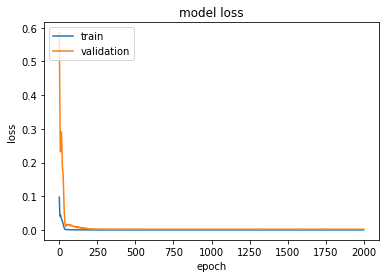

In [19]:
print(history.history.keys())
# plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
# Validating data using model
y_pred_scale = model.predict(x_valid_scale)

# The predictions are scaled back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scale)

df = pd.DataFrame({'Actual' : y_valid.values.flatten(),'Predicted' : y_pred.flatten()}) #YANG INI DIBANDINGKAN DENGAT DATA ASLI BUKAN DATA PREDIKSI HASIL MLR
df = df.sort_index()
df.tail()

,Actual,Predicted
66,10047,10815.636719
67,11278,11347.710938
68,11557,11043.346680
69,12818,10297.359375
70,14224,11852.196289


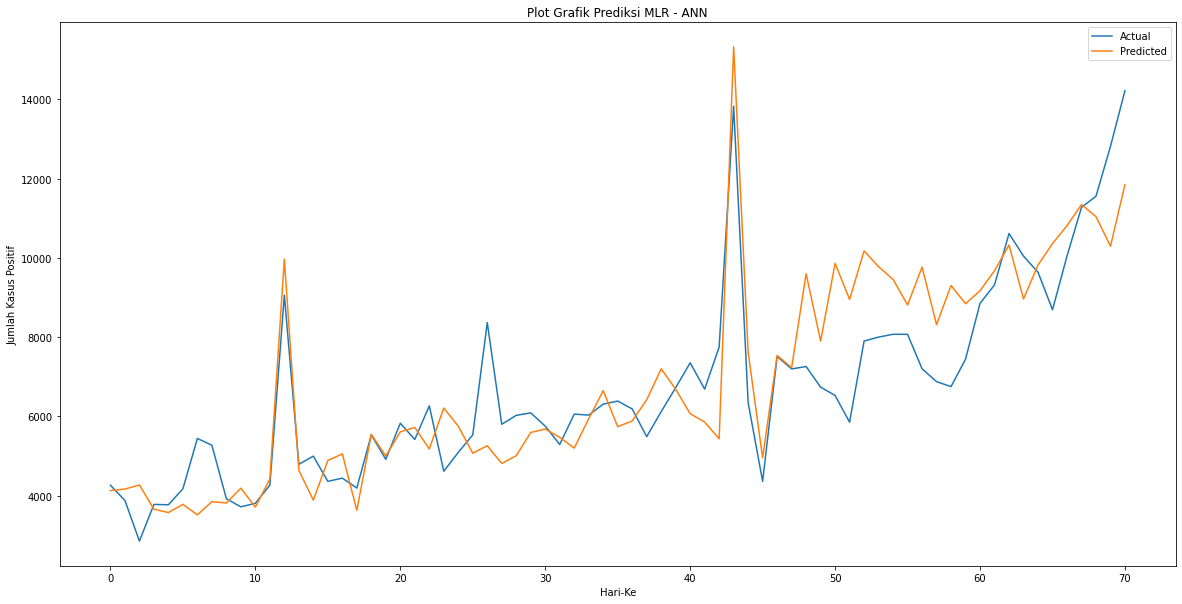

In [21]:
import matplotlib.pyplot as plt
df.plot(kind='line', 
             stacked=False,
             figsize=(20, 10),
             )
plt.title('Plot Grafik Prediksi MLR - ANN')
plt.ylabel('Jumlah Kasus Positif')
plt.xlabel('Hari-Ke')
plt.savefig('ANN-MLR.png')
plt.show()

# Evaluating Linear Regression model - Artificial Neural Network

In [22]:
MAE = mean_absolute_error(y_valid,y_pred)
MSE = mean_squared_error(y_valid,y_pred)
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((np.array(y_valid) - np.array(y_pred)) / np.array(y_valid))) * 100
print('MAE = {0:.4f} '.format(MAE))
print('MSE = {0:.4f} '.format(MSE))
print('RMSE = {0:.4f} '.format(RMSE))
print('MAPE = {0:.4f} '.format(MAPE))

MAE = 947.2838 
MSE = 1631596.1102 
RMSE = 1277.3395 
MAPE = 14.3196 
